In [2]:
import Bio
import numpy as np
import math, random
import matplotlib.pyplot as plt

Task 1 Begin
-------

In [3]:
kp = 0.1
km = 0.3
random.seed(3)

To = 1/km
Tc = 1/kp

r = random.random()
start=0.5
if r<0.5:
    start=0
else:
    start=1

current = start
dt = 1
for t in range(100):
    Q = np.array([[1-(kp*dt), (km*dt)],[(kp*dt), 1-(km*dt)]])
    if current==0:
        y = random.random()
        if y<Q[0][1]:
            current = 1
            print("Open->Closed@ "+str(t))
            dt = 0
    else:
        x = random.random()
        if x<Q[1][0]:
            current = 0
            print("Closed->Open@ "+str(t))
            dt = 0
    dt += 1

Open->Closed@ 1
Closed->Open@ 4
Open->Closed@ 5
Closed->Open@ 8
Open->Closed@ 10
Closed->Open@ 14
Open->Closed@ 17
Closed->Open@ 20
Open->Closed@ 22
Closed->Open@ 24
Open->Closed@ 26
Closed->Open@ 31
Open->Closed@ 33
Closed->Open@ 36
Open->Closed@ 37
Closed->Open@ 42
Open->Closed@ 44
Closed->Open@ 53
Open->Closed@ 54
Closed->Open@ 60
Open->Closed@ 62
Closed->Open@ 64
Open->Closed@ 67
Closed->Open@ 70
Open->Closed@ 71
Closed->Open@ 74
Open->Closed@ 76
Closed->Open@ 83
Open->Closed@ 84
Closed->Open@ 86
Open->Closed@ 87
Closed->Open@ 90
Open->Closed@ 91
Closed->Open@ 96
Open->Closed@ 98


In [4]:
print(Q)

[[0.9 0.3]
 [0.1 0.7]]


In [5]:
currents = start
t = 1
while t<=100:
    rtwo = random.random()
    TC = (1/kp) *np.log(1/rtwo)
    TO = (1/km) *np.log(1/rtwo)
    if currents==0:
        print("op>clo @ "+str(t+TO))
        t += TO
        currents = 1
    else:
        print("clo>op @ "+str(t+TC))
        t += TC
        currents = 0

op>clo @ 2.727005441661672
clo>op @ 8.53839442883585
op>clo @ 10.13116902006394
clo>op @ 10.743316140038381
op>clo @ 13.00728742463204
clo>op @ 21.41931590560656
op>clo @ 22.512888791405924
clo>op @ 36.88305668297833
op>clo @ 40.88424495142404
clo>op @ 41.108773684625554
op>clo @ 43.28131015847655
clo>op @ 49.288257912690206
op>clo @ 64.1852976850237
clo>op @ 72.97499803120695
op>clo @ 74.7909552093812
clo>op @ 113.8847750171413


Task 2 Begin
-------

In [53]:
Mextra = 1.2 #extracellular
Mmax = 1000
M = 0
km = 5 #ratecon
t = 0
Mt = 0 #startVal
kpl = 0.1 #k+
kmi = 0.3 #k-
a1 = kpl #propensity open
a2 = kmi #propensity close
a3 = km*Mextra #propensity pass ion >>> 0 is closed
currents = 1
ooo = []
ccc = []
ppp = []
ttt = []
while M<Mmax:
    r1 = random.random()
    r2 = random.random()
    if currents == 0:
        a0 = a1+a2+a3
    else:
        a0 = a1+a2
    tau = (1/a0)*np.log(1/r1)
    if currents == 0:
        if r2>=(1/a0)*a1 and r2<(1/a0)*(a1+a2):
            #print("reaction closing")
            ccc.append([t,M])
            currents = 1
        elif r2>=(1/a0)*(a1+a2):
            #print("reaction ion passing")
            M = M+1
            ppp.append([t,M])
    else:
        if r2<(1/a0)*a1:
            #print("reaction opening")
            ooo.append([t,M])
            currents = 0
    ttt.append([t,M])
    t=t+1
#print(ppp[:500])

In [82]:
ppp = np.asarray(ppp)
ccc = np.asarray(ccc)
ooo = np.asarray(ooo)
ttt = np.asarray(ttt)
fivehundo = ppp[:500,0]
comp_open = []
for i in range(len(ccc)):
    for j in range(ooo[i][0],ccc[i][0]+1):
        comp_open.append([j,ttt[j][1]])
comp_closed = []
for i in range(len(ooo)-1):
    for j in range(ccc[i][0],ooo[i+1][0]):
        comp_closed.append([j,ttt[j][1]])
#print(comp_closed)
comp_open = np.asarray(comp_open)
comp_closed = np.asarray(comp_closed)

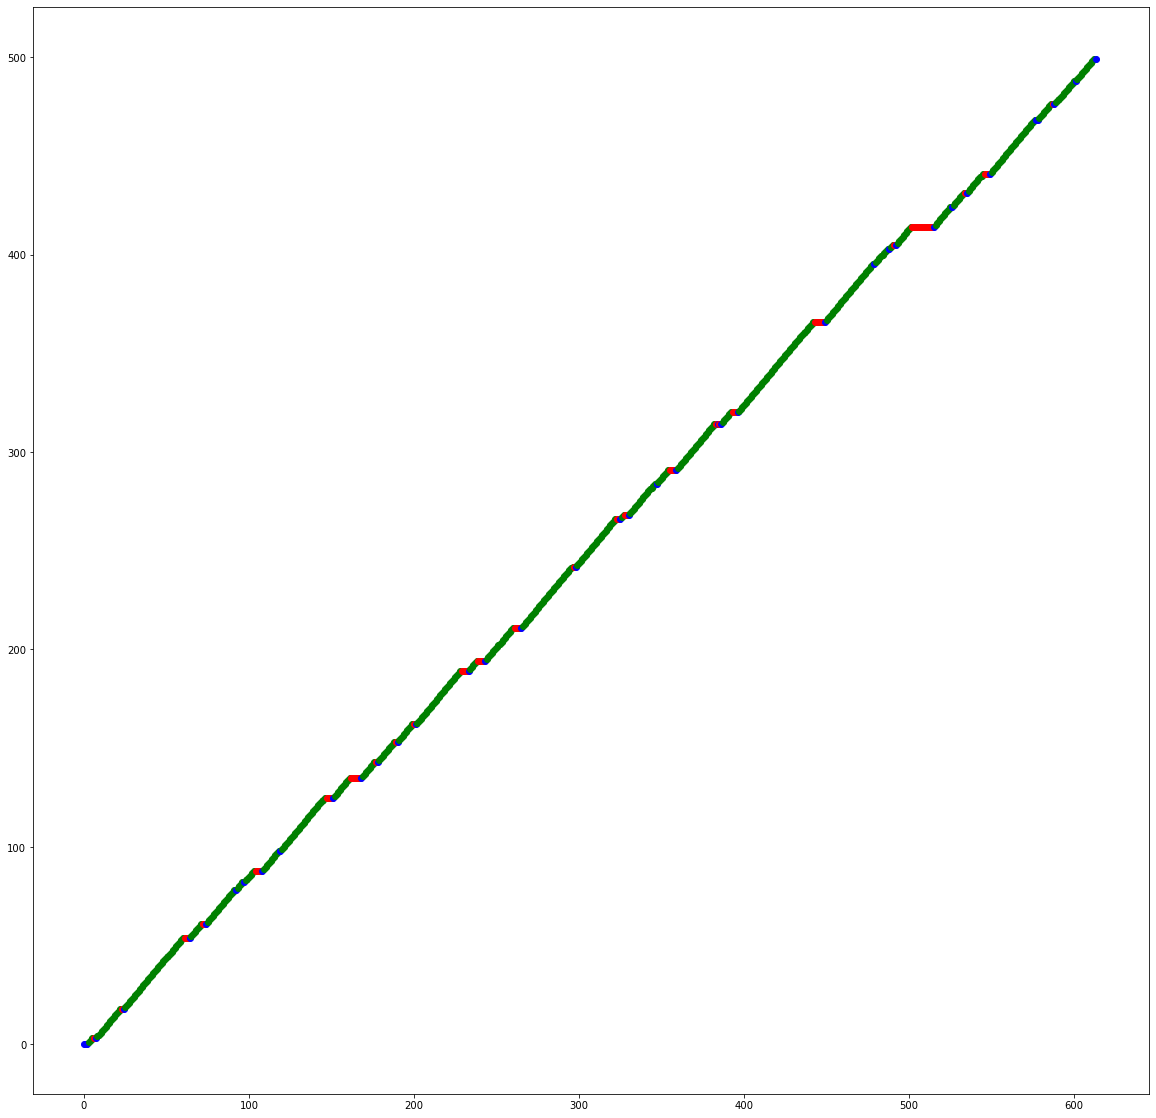

In [83]:
fig = plt.figure(figsize=(20,20))
maxT = fivehundo[499]
for i in range(maxT):
    if i in comp_closed[:,0]:
        c = 'r'
    elif i in fivehundo[:]:
        c = 'g'
    else:
        c = 'b'
    plt.scatter(ttt[i,0],ttt[i,1],color=c)
    #blue is open (but not passing)
    #green is open and passing
    #red is closed (and not passing)

Task 3 Begin
-------------

In [80]:
D = 0.000005
